# Millennium Simulation Data Consistency Check: Overlaying Foreground galaxies on Ray-traced Shear and Convergence Maps

We must make sure that our galaxy/halo catalogs are read in correctly before we try and use them. In this demo we make plots of the ray-traced convergence and shear fields, and then overlay the associated foreground galaxies, sized by their stellar mass.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import scipy as sp
import os,sys
import astropy.io.fits as pyfits
import matplotlib.pyplot as plt
import cmath
%matplotlib inline

In [3]:
# Pangloss:
PANGLOSS_DIR = os.path.expandvars("$PANGLOSS_DIR")
sys.path.append(PANGLOSS_DIR)
import pangloss

In [4]:
K = pangloss.Kappamap(PANGLOSS_DIR+'/data/GGL_los_8_0_0_N_4096_ang_4_rays_to_plane_37_f.kappa',FITS=False)

In [5]:
S = pangloss.Shearmap([PANGLOSS_DIR+'/data/GGL_los_8_0_0_N_4096_ang_4_rays_to_plane_37_f.gamma_1',PANGLOSS_DIR+'/data/GGL_los_8_0_0_N_4096_ang_4_rays_to_plane_37_f.gamma_2'],FITS=False)

In [6]:
config = pangloss.Configuration(PANGLOSS_DIR+'/example/example.config')
F = pangloss.ForegroundCatalog(PANGLOSS_DIR+'/data/GGL_los_8_0_0_0_0_N_4096_ang_4_Guo_galaxies_on_plane_27_to_63.images.txt',config)

In [7]:
B = pangloss.BackgroundCatalog(sigma_e=0.5) # High ellipticity used to highlight the intrinsic shape of background sources

Now we have all the data we need, let's plot the maps and overlay the galaxies - first on the whole catalog, and then in a zoomed-in view.

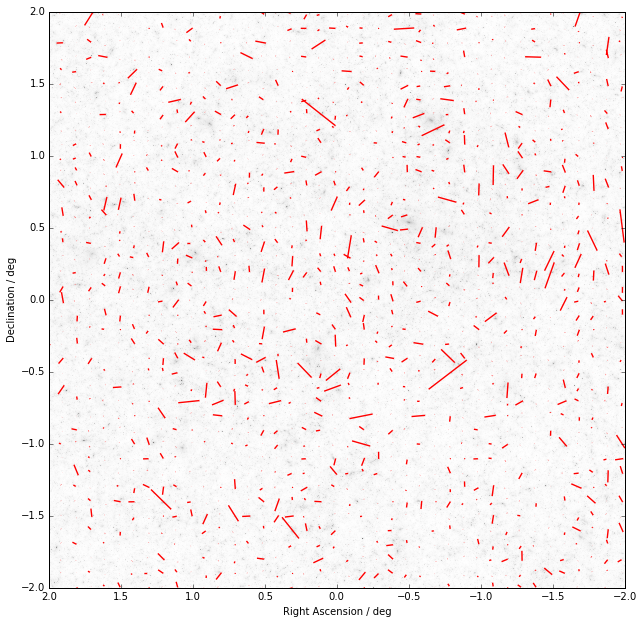

In [8]:
K.plot()
S.plot()

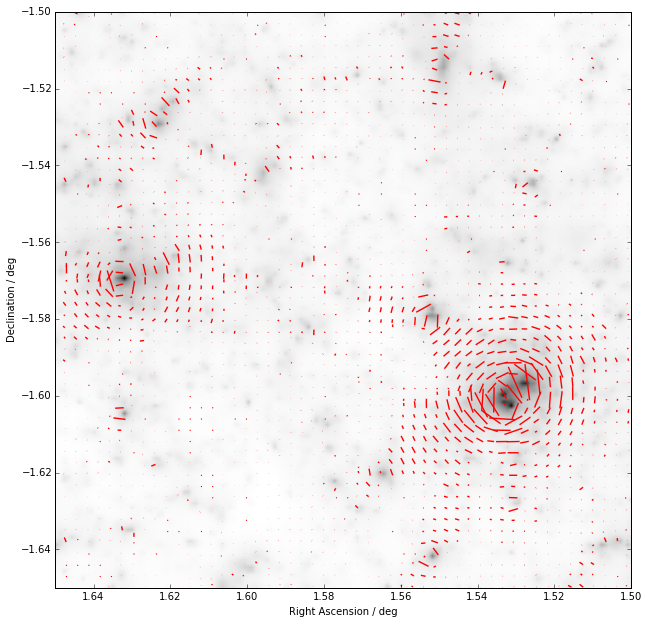

In [9]:
# Now works with subplots
K.plot(subplot=[1.65,1.5,-1.65,-1.5])
S.plot(subplot=[1.65,1.5,-1.65,-1.5])

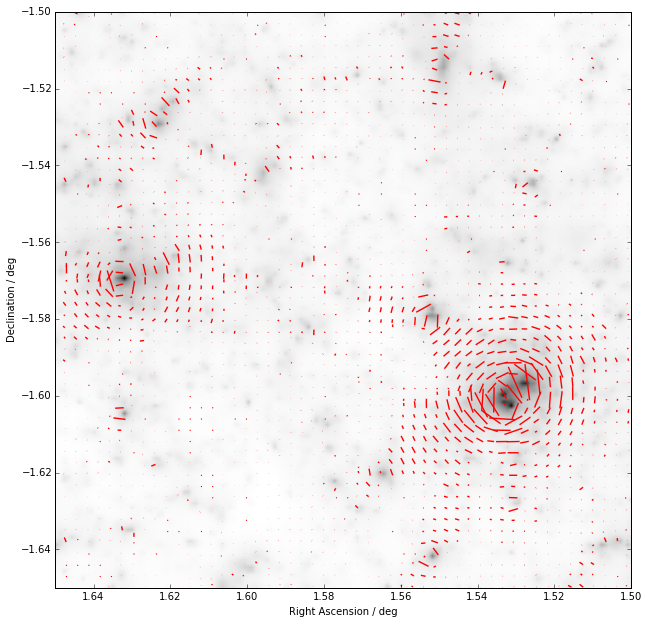

In [10]:
# The shearmap can also figure out the subplot from Kappamap if nothing is passed!
K.plot(subplot=[1.65,1.5,-1.65,-1.5])
S.plot()

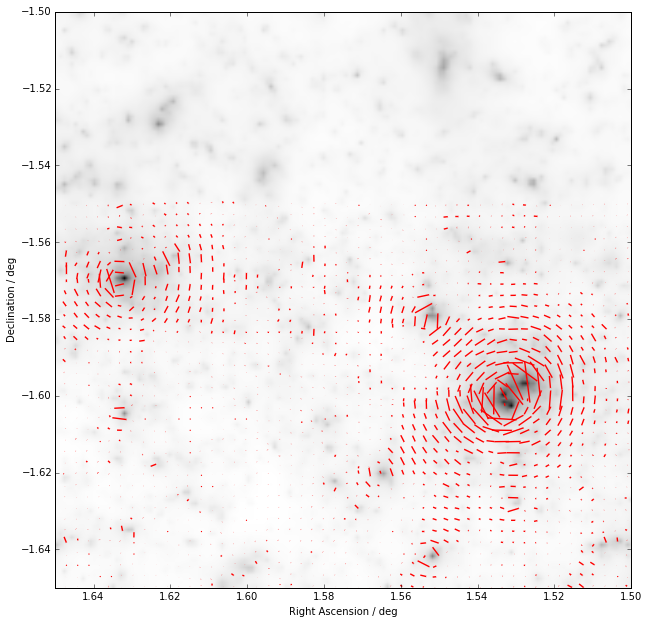

In [11]:
# If different subplots are passed, the Kappamap subplot is viewed and the overlapping shear sticks are plotted.
K.plot(subplot=[1.65,1.5,-1.65,-1.5])
S.plot(subplot=[1.65,1.5,-1.65,-1.55])

Now adding catalogs:

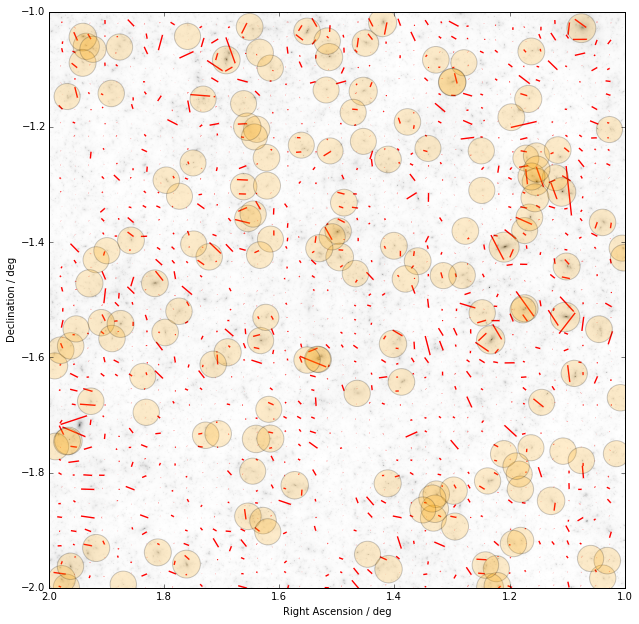

In [12]:
# Whole (0,0) field:
K.plot(subplot=[2,1,-2,-1])
S.plot()
F.plot(mass_lim=[10**11,10**12])

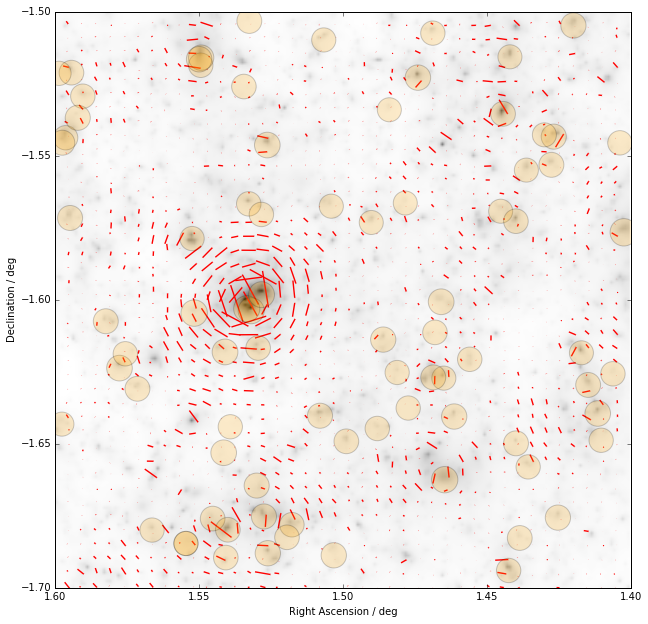

In [13]:
# Zoomed in:
K.plot(fig_size=10,subplot=[1.6,1.4,-1.7,-1.5])
S.plot()
F.plot(mass_lim=[10**10.7,10**12])

However, `ForegroundCatalog` instances can plot themselves without any maps:

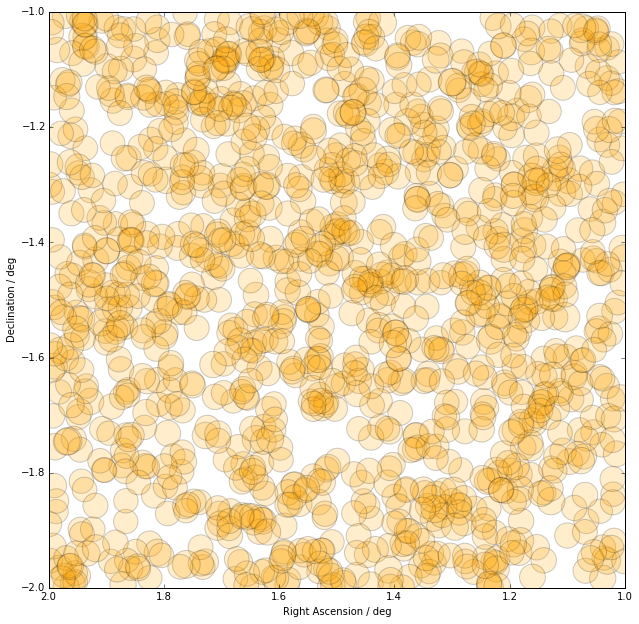

In [14]:
F.plot(mass_lim=[10**10.75,10**12])

We can also add a generated background catalog of galaxies to the overlays:

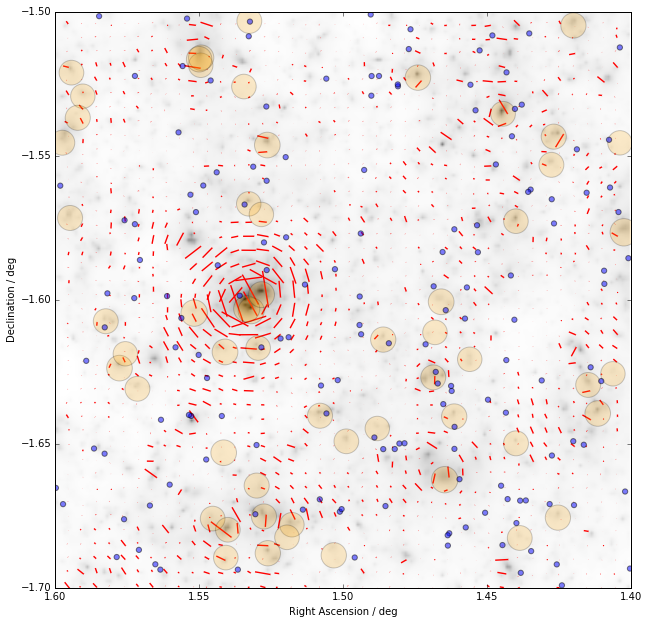

In [15]:
K.plot(fig_size=10,subplot=[1.6,1.4,-1.7,-1.5])
S.plot()
F.plot(mass_lim=[10**10.75,10**12])
B.plot(mass_lim=[10**11.95,10**12])

The background galaxies by default plot as points as there are so numerous (notice the very small mass range allowed in the previous plot). However, they can also be plotted as ellipses to show their intrinsic shape using the optional parameter `graph='ellipse'`. The foreground and background galaxies use the same mass scaling for plotting.

/home/spencer/Documents/Pangloss/pangloss/plotting.py:133: RuntimeWarning: invalid value encountered in sqrt
  ellipse = Ellipse(xy=[ra,dec],width=size,height=np.sqrt(q)*size,angle=phi)


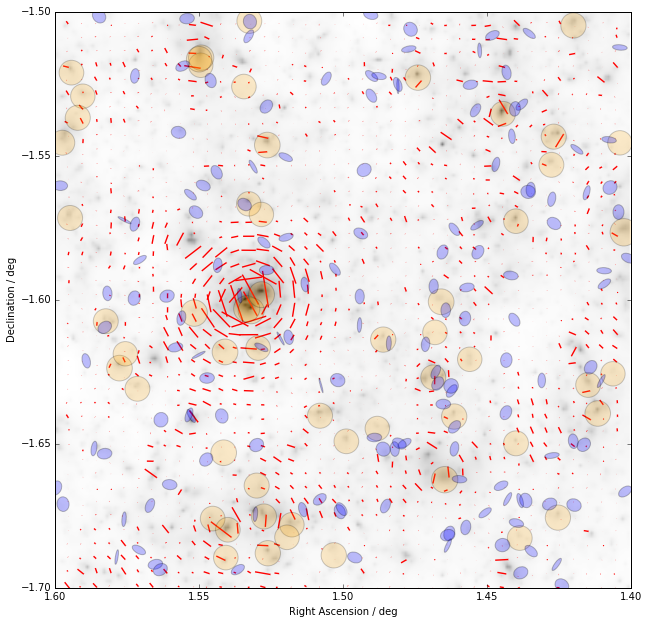

In [16]:
K.plot(fig_size=10,subplot=[1.6,1.4,-1.7,-1.5])
S.plot()
F.plot(mass_lim=[10**10.75,10**12])
B.plot(mass_lim=[10**11.95,10**12],graph='ellipse')

Like foreground catalogs, a background catalog can also plot itself when no maps are present.

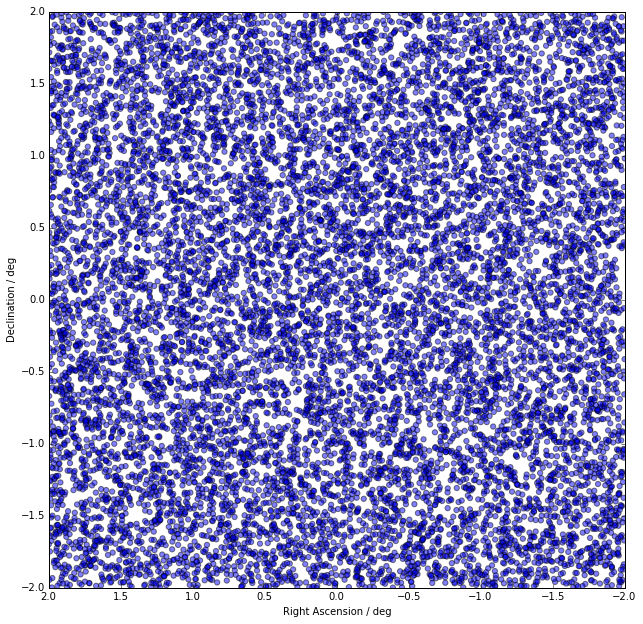

In [17]:
B.plot(mass_lim=[10**11.99,10**12])

## Scratch pad

## By-Hand Lensing Calculations

In [49]:
B = pangloss.BackgroundCatalog(N=10,domain=[1.55,1.52,-1.61,-1.59],sigma_e=0.01)
B.lens_by_map(K,S)

In [50]:
domain = [1.55,1.52,-1.61,-1.59]
galaxies = B.return_galaxies(ra_lim=[1.55,1.52],dec_lim=[-1.61,-1.59],mass_lim=[10**11,10**12])

i = 5
ra = np.rad2deg(galaxies['RA'][i])
print 'RA: ',ra
dec = np.rad2deg(galaxies['Dec'][i])
print 'Dec: ',dec
mass = galaxies['Mstar_obs'][i]
print 'mass: ',mass
mag = galaxies['mag'][i]
print 'mag: ',mag
eMod_int = galaxies['eMod_int'][i]
print 'eMod_int: ',eMod_int
eMod = galaxies['eMod'][i]
print 'eMod: ',eMod
ePhi_int = galaxies['ePhi_int'][i]
print 'ePhi_int: ',ePhi_int
ePhi = galaxies['ePhi'][i]
print 'ePhi: ',ePhi
e1_int = galaxies['e1_int'][i]
print 'e1_int: ',e1_int
e1 = galaxies['e1'][i]
print 'e1: ',e1
e2_int = galaxies['e2_int'][i]
print 'e2_int: ',e2_int
e2 = galaxies['e2'][i]
print 'e2: ',e2
kappa = K.at(ra,dec,mapfile=0)
print 'kappa: ',kappa
gamma1 = S.at(ra,dec,mapfile=0)
print 'gamma1: ',gamma1
gamma2 = S.at(ra,dec,mapfile=1)
print 'gamma2: ',gamma2

RA:  1.54347140445
Dec:  -1.60933372358
mass:  456036940786.0
mag:  1.19379506758
eMod_int:  0.0261938427608
eMod:  0.110028506623
ePhi_int:  -0.109811952671
ePhi:  -37.4731019057
e1_int:  0.0261936503264
e1:  0.0285772483484
e2_int:  -0.000100404951362
e2:  -0.106252591246
kappa:  0.0471964268615
gamma1:  0.00255458110433
gamma2:  -0.101074719069


"\n# Plotting ellipse/stick by hand\nscale = 0.5            \nfloor = 0.01\nsize = 0.01*(scale*(scale > 0) + floor)\n\nq = (1-eMod)/(1+eMod)\nellipse = Ellipse(xy=[1.533,-1.596],width=size,height=np.sqrt(q)*size,angle=30)\naxis = plt.gca()\naxis.add_artist(ellipse)      \nellipse.set_clip_box(axis.bbox)\nellipse.set_alpha(0.3)\nellipse.set_facecolor('purple')\n\npangloss.plotting.plot_sticks(1.533,-1.596,eMod,30,axis,'purple')\n"

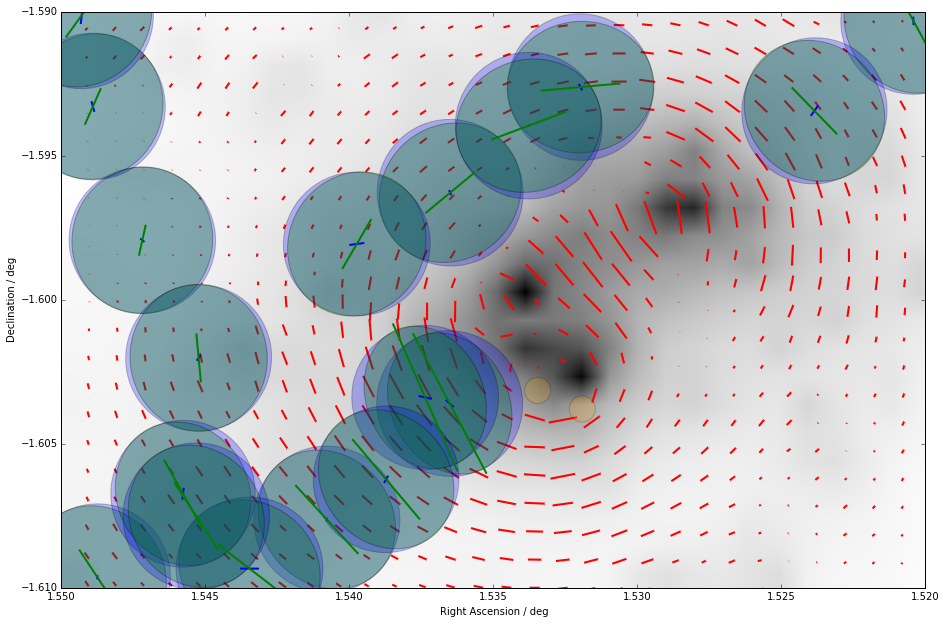

In [51]:

from matplotlib.patches import Ellipse

s =[1.55,1.52,-1.61,-1.59]
#s = [ra+0.05,ra-0.05,dec-0.05,dec+0.05]
K.plot(fig_size=15,subplot=s)
S.plot()
F.plot(mass_lim=[10**11,10**12])
B.plot(mass_lim=[10**11,10**12],graph='ellipse',lensed='both')
B.plot(mass_lim=[10**11,10**12],graph='stick',lensed='both')
#plt.scatter(ra,dec,color='green',s=200)
#print 'ePhi_int: ',ePhi_int,'ePhi: ',ePhi

'''
# Plotting ellipse/stick by hand
scale = 0.5            
floor = 0.01
size = 0.01*(scale*(scale > 0) + floor)

q = (1-eMod)/(1+eMod)
ellipse = Ellipse(xy=[1.533,-1.596],width=size,height=np.sqrt(q)*size,angle=30)
axis = plt.gca()
axis.add_artist(ellipse)      
ellipse.set_clip_box(axis.bbox)
ellipse.set_alpha(0.3)
ellipse.set_facecolor('purple')

pangloss.plotting.plot_sticks(1.533,-1.596,eMod,30,axis,'purple')
'''

"\n# Plotting ellipse/stick by hand\nscale = 0.5            \nfloor = 0.01\nsize = 0.01*(scale*(scale > 0) + floor)\n\naxis = plt.gca()\npangloss.plotting.plot_sticks(1.533,-1.596,eMod,30,axis,'purple')\n"

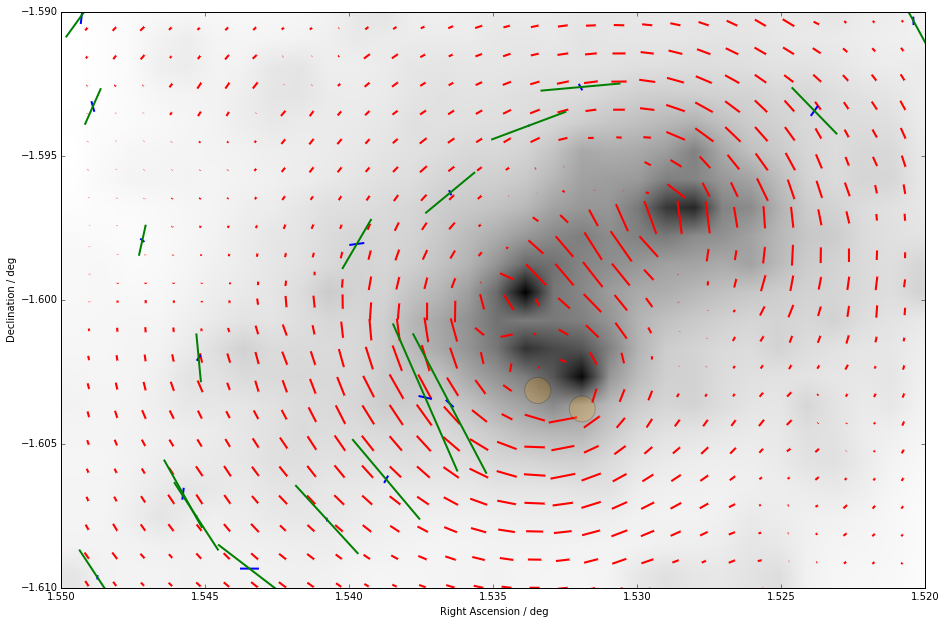

In [52]:

from matplotlib.patches import Ellipse

s = [1.55,1.52,-1.61,-1.59]
#s = [ra+0.05,ra-0.05,dec-0.05,dec+0.05]
K.plot(fig_size=15,subplot=s)
S.plot()
F.plot(mass_lim=[10**11,10**12])
#B.plot(mass_lim=[10**11,10**12],graph='ellipse',lensed='both')
B.plot(mass_lim=[10**11,10**12],graph='stick',lensed='both')
#plt.scatter(ra,dec,color='green',s=200)
'''
# Plotting ellipse/stick by hand
scale = 0.5            
floor = 0.01
size = 0.01*(scale*(scale > 0) + floor)

axis = plt.gca()
pangloss.plotting.plot_sticks(1.533,-1.596,eMod,30,axis,'purple')
'''

In [53]:
g = (gamma1+1j*gamma2)/(1.0-kappa)
print 'kappa, gamma1, gamma2: ',kappa,gamma1,gamma2
print 'g: ',g
gMod = abs(g)
gPhi = 0.5*np.rad2deg(cmath.phase(g))
gPhi2 = 0.5*np.rad2deg(np.arctan2(g.imag,g.real))
print 'gMod: ',gMod
print 'gPhi: ',gPhi
print 'gPhi2: ',gPhi2

kappa, gamma1, gamma2:  0.0471964268615 0.00255458110433 -0.101074719069
g:  (0.00268112040755-0.106081381219j)
gMod:  0.106115257376
gPhi:  -44.276102059
gPhi2:  -44.276102059


In [54]:
g_conj = g.conjugate()
print 'g_conj: ',g_conj

g_conj:  (0.00268112040755+0.106081381219j)


In [55]:
e_int = e1_int+1j*e2_int
print 'e_int: ',e_int

e_int:  (0.0261936503264-0.000100404951362j)


In [56]:
e = (e_int+g)/(1.0+g_conj*e_int)
print 'e: ',e

e:  (0.0285772483484-0.106252591246j)


In [45]:
e1_calc, e2_calc = e.real, e.imag
e1_int,e2_int = e_int.real,e_int.imag
print 'e1_calc: ',e1_calc
print 'e1_int:',e1_int
print 'e2_calc: ',e2_calc
print 'e2_int:',e2_int

e1_calc:  0.120411926784
e1_int: 0.0158610578042
e2_calc:  0.0129145315154
e2_int: 0.00172769373918


In [46]:
import cmath

eMod_calc = abs(e)
eMod_int2 = abs(e_int)
ePhi_calc = 0.5*np.rad2deg(cmath.phase(e))
print 'eMod_calc: ',eMod_calc
print 'eMod_int:',eMod_int
print 'eMod_int2:',eMod_int2
print 'ePhi_calc: ',ePhi_calc
print 'ePhi_int: ',ePhi_int

eMod_calc:  0.121102507142
eMod_int: 0.0159548763807
eMod_int2: 0.0159548763807
ePhi_calc:  3.06086921016
ePhi_int:  3.10826741349


In [47]:
print 'e1, e1_calc: ',e1,',',e1_calc
print 'e2, e2_calc: ',e2,',',e2_calc
print 'eMod, eMod_calc: ',eMod,',',eMod_calc
print 'ePhi, ePhi_calc: ',ePhi,',',ePhi_calc

e1, e1_calc:  0.120411926784 , 0.120411926784
e2, e2_calc:  0.0129145315154 , 0.0129145315154
eMod, eMod_calc:  0.121102507142 , 0.121102507142
ePhi, ePhi_calc:  3.06086921016 , 3.06086921016


(array([ 2.,  2.,  2.,  0.,  3.,  2.,  2.,  1.,  1.,  2.]),
 array([-60.67195567, -48.90153839, -37.13112112, -25.36070385,
        -13.59028657,  -1.8198693 ,   9.95054797,  21.72096525,
         33.49138252,  45.26179979,  57.03221707]),
 <a list of 10 Patch objects>)

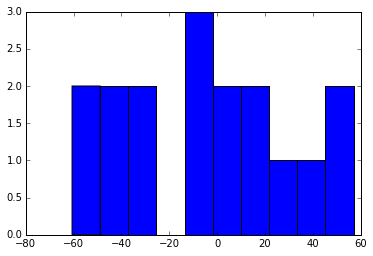

In [48]:
plt.hist(galaxies['ePhi_int'])